In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix
from time import sleep
import math
import numpy as np

In [2]:
pd.options.display.max_columns = None
%matplotlib inline

In [3]:
df=pd.read_csv(r'C:\Users\subhajit.choudhury\Desktop\machine learning\kaggle\forest-cover-type-prediction\train.csv')
testdf=pd.read_csv(r'C:\Users\subhajit.choudhury\Desktop\machine learning\kaggle\forest-cover-type-prediction\test.csv')
predictionsfile = r'C:\Users\subhajit.choudhury\Desktop\machine learning\kaggle\forest-cover-type-prediction\submission_1.csv'

In [4]:
df = df[df['Cover_Type'].isin([1,2])]
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
5,6,2579,132,6,300,-15,67,230,237,140,6031,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
11,12,2886,151,11,371,26,5253,234,240,136,4051,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
12,13,2742,134,22,150,69,3215,248,224,92,6091,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2


In [5]:
df.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.0,4320.000000,4320.000000,4320.000000,4320.0,4320.000000,4320.0,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.0,4320.0,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.0,4320.000000,4320.000000,4320.000000,4320.000000
mean,7154.387269,3025.283102,155.280324,13.268287,279.618056,44.309722,2502.753704,212.867361,224.309259,143.508333,2074.845139,0.508333,0.057176,0.429861,0.004630,0.0,0.000694,0.002778,0.005787,0.0,0.001620,0.0,0.000231,0.002315,0.020833,0.016667,0.052546,0.023380,0.0,0.0,0.005324,0.002083,0.003704,0.006481,0.022222,0.002778,0.076157,0.121528,0.046296,0.000231,0.006019,0.002778,0.001389,0.222454,0.052083,0.048843,0.112269,0.085185,0.002778,0.000926,0.000463,0.0,0.020139,0.018981,0.012037,1.500000
std,4878.528014,199.990007,112.475887,6.929641,218.457251,57.537375,1565.431471,25.241813,18.125510,35.654486,1332.957827,0.499988,0.232205,0.495113,0.067892,0.0,0.026346,0.052637,0.075861,0.0,0.040226,0.0,0.015215,0.048062,0.142843,0.128034,0.223152,0.151123,0.0,0.0,0.072780,0.045601,0.060752,0.080256,0.147423,0.052637,0.265281,0.326777,0.210150,0.015215,0.077354,0.052637,0.037246,0.415942,0.222221,0.215564,0.315733,0.279189,0.052637,0.030418,0.021514,0.0,0.140492,0.136475,0.109064,0.500058
min,3.000000,2169.000000,0.000000,0.000000,0.000000,-146.000000,30.000000,83.000000,115.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
25%,1394.500000,2897.000000,57.000000,8.000000,108.000000,6.000000,1233.000000,200.000000,214.000000,121.000000,1129.750000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
50%,8512.000000,3038.500000,124.000000,12.000000,237.000000,27.000000,2200.000000,218.000000,226.000000,143.000000,1834.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.500000
75%,11128.000000,3178.000000,263.000000,17.000000,402.000000,65.000000,3535.750000,231.000000,237.000000,168.00

In [6]:
#df.isnull().sum()

In [7]:
# #HISTOGRAMS NON SOIL COLS
# cols = [x for x in df.columns if 'Soil'not in x]
# cols = sorted(cols)
# df[cols].hist(figsize=(20,10))
# plt.show()

In [8]:
#ELEVATION SCATTER MAP
#df.plot.scatter('Id','Elevation',c='Cover_Type',figsize=(20,7),cmap='tab10')
df['bin_Elevation'] = df.Elevation//50

In [9]:
#WILDERNERNESS AREA STACKED BAR CHART
wilderness_cols = [x for x in df.columns if 'Wilderness' in x]
wildernessvals = []
for index,row in df.iterrows():
    for col in wilderness_cols:
        if row[col]!=0:
            wildernessvals.append(int(col[-1:]))
data = {'Wilderness': wildernessvals, 'Cover_Type': df['Cover_Type']} 
df['Wild_Area'] = wildernessvals
df = df.drop(wilderness_cols,axis=1)
tempdf = pd.DataFrame(data)
#tempdf.describe()
#tempdf.groupby(['Wilderness','Cover_Type']).size().unstack().plot(kind='bar', stacked=True, figsize=(15,5))

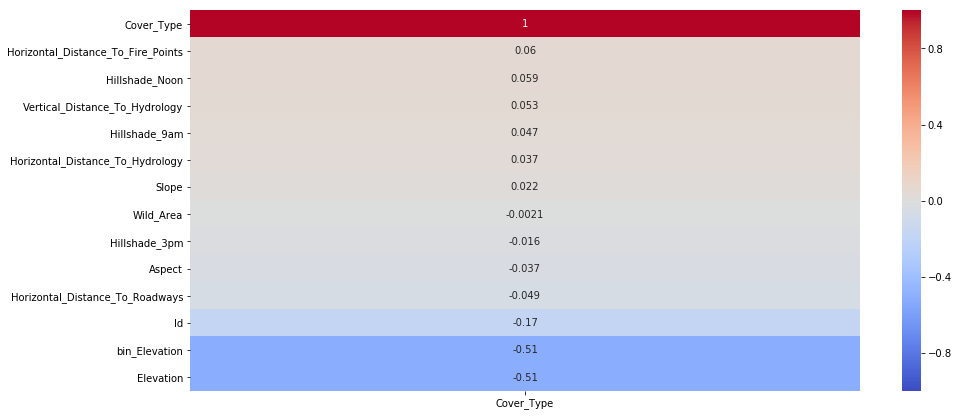

In [10]:
# CORRELATION CHARTS
cols=sorted([x for x in df.columns if ('Soil' not in x or 'Cover' in x)])
corr = df[cols].corr() 
plt.figure(figsize=(15,7))
sns.heatmap(corr[['Cover_Type']].sort_values(by='Cover_Type',ascending=False),vmin=-1,cmap='coolwarm',annot=True)
#sns.heatmap(corr,vmin=-1,cmap='coolwarm',annot=True)
plt.show()

In [11]:
# sortedcorr = corr.abs().unstack().sort_values(ascending=False)
# #print(sortedcorr)
# sortedcorr = [(i,v) for (i,v) in sortedcorr.iteritems() if v != 1 and v >0.4]
# sortedcorr = sortedcorr[0::2]
# sortedcorr

In [12]:
# for i in sortedcorr:
#     sns.pairplot(df, hue="Cover_Type", size=5, x_vars=i[0][0],y_vars=i[0][1] )
#     plt.show()

In [13]:
#df['Distance_To_Hydrology'] = np.sqrt((df['Horizontal_Distance_To_Hydrology'])**2 + (df['Vertical_Distance_To_Hydrology'])**2)
# df['Hillshade2'] = np.sqrt((df['Hillshade_3pm'])**2 + (df['Hillshade_9am'])**2)
# df['EleHorzDist1'] = (df.Elevation*0.5) - df.Horizontal_Distance_To_Hydrology
# df['EleVertDist2'] = df.Elevation + df.Vertical_Distance_To_Hydrology
# df['EleRoadDist1'] = df.Elevation + (df.Horizontal_Distance_To_Roadways*0.5)
# df['EleFireDist1'] = df.Elevation + (df.Horizontal_Distance_To_Fire_Points*0.5)
# df['Sol22_23'] = df.Soil_Type22 + df.Soil_Type23
df['Sol10_12'] = df.Soil_Type10 + df.Soil_Type11 + df.Soil_Type12 
df['Sol22_23'] = df.Soil_Type22 + df.Soil_Type23
df['Sol38_40'] = df.Soil_Type38 + df.Soil_Type39 + df.Soil_Type40

In [14]:
# #VARIANCE AND STD
# means = df.std()
# plt.figure(figsize=(20,5))
# plt.plot(df.columns,means)
# plt.xticks(rotation=90)
# plt.grid()
# plt.show()

In [15]:
# #SOIL TYPE HEATMAPS
# soilcols=sorted([x for x in df.columns if 'Soil' in x])
# for i in range(1,8):
#     plt.figure(figsize=(20,5))
#     covertitle = "Covertype"+str(i)
#     plt.title(covertitle)
#     sns.heatmap(df[soilcols][df.Cover_Type==i])
#     plt.show()

In [16]:
# for col in df.columns:
#     if df[col].var() == 0:
#         print(col)
df = df.drop(['Soil_Type7','Soil_Type15','Id'],axis=1)
#df = df.drop(['Soil_Type1','Soil_Type5','Soil_Type14','Soil_Type37'],axis=1)
#df = df.drop(soilcols,axis=1)

In [27]:
distcols = [x for x in df.columns if 'Dist' in x]
shadecols = [x for x in df.columns if 'shade' in x]
collist1 = ['Aspect','Elevation','Slope']
colscombo1 = distcols + shadecols + collist1
soilcols=sorted([x for x in df.columns if 'Soil' in x])

In [18]:
# for col in colscombo1: 
#     #print(col,len(df[col].unique()))
#     bins= len(df[col].unique())//10
# #     df.groupby([pd.cut(df[col],bins),'Cover_Type']).size().unstack().plot.bar(stacked=True,figsize=(20,5))
# #     plt.show()
#     df['bin_'+col] = pd.cut(df[col],bins)
#     le = LabelEncoder()
#     df['bin_'+col] = le.fit_transform(df['bin_'+col])

In [56]:
bincols = [x for x in df.columns if 'bin_' in x]
x = df.drop('Cover_Type',axis=1)
y = df['Cover_Type']
x = x.drop(bincols,axis=1)
x = x.drop(soilcols,axis=1)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [20]:
# scoredict = {}
# for opt in range(19,21):   
#     estimator = RandomForestClassifier(n_estimators=20,max_features=opt)
#     scores=cross_val_score(estimator,x,y,cv=10,scoring='accuracy')
#     scoredict[opt]=scores.mean()
#     print('\r', 'Iteration', opt, 'Score:', scores.mean(), end='')
# plt.figure(figsize=(15,10))    
# plt.plot(scoredict.keys(),scoredict.values())
# plt.grid()
# plt.show()

In [60]:
x.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wild_Area,Sol10_12,Sol22_23,Sol38_40
2,2804,139,9,268,65,3180,234,238,135,6121,1,1,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0
5,2579,132,6,300,-15,67,230,237,140,6031,1,0,0,0
11,2886,151,11,371,26,5253,234,240,136,4051,1,0,0,0
12,2742,134,22,150,69,3215,248,224,92,6091,1,0,0,0


In [74]:
#estimator = RandomForestClassifier(n_estimators=100)
estimator = ExtraTreesClassifier(n_estimators=100)
estimator = KNeighborsClassifier(n_neighbors=6)
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,random_state=45)
estimator.fit(x_train,y_train)
y_pred = estimator.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[438, 101],
       [133, 408]], dtype=int64)

In [51]:
probs = estimator.predict_proba(x_test)
y_testl = list(y_test)
for i,prob in enumerate(probs):
    print(i,prob[0],prob[1],y_pred[i],y_testl[i])


0 0.69 0.31 1 1
1 0.35 0.65 2 2
2 0.1 0.9 2 2
3 0.92 0.08 1 1
4 0.43 0.57 2 2
5 0.84 0.16 1 2
6 0.99 0.01 1 1
7 0.95 0.05 1 1
8 0.11 0.89 2 2
9 0.89 0.11 1 1
10 1.0 0.0 1 1
11 0.59 0.41 1 1
12 0.87 0.13 1 1
13 0.67 0.33 1 1
14 0.9 0.1 1 1
15 0.37 0.63 2 2
16 0.19 0.81 2 2
17 0.21 0.79 2 2
18 0.95 0.05 1 1
19 0.05 0.95 2 2
20 0.91 0.09 1 1
21 0.52 0.48 1 1
22 0.19 0.81 2 2
23 0.98 0.02 1 1
24 0.72 0.28 1 1
25 0.67 0.33 1 1
26 0.12 0.88 2 1
27 0.73 0.27 1 1
28 0.98 0.02 1 1
29 0.8 0.2 1 1
30 0.9 0.1 1 1
31 0.95 0.05 1 1
32 0.15 0.85 2 2
33 0.08 0.92 2 2
34 0.84 0.16 1 1
35 0.23 0.77 2 1
36 1.0 0.0 1 1
37 0.68 0.32 1 1
38 0.05 0.95 2 2
39 0.26 0.74 2 1
40 0.89 0.11 1 1
41 0.47 0.53 2 1
42 0.8 0.2 1 1
43 0.76 0.24 1 2
44 1.0 0.0 1 1
45 0.92 0.08 1 1
46 0.11 0.89 2 2
47 0.25 0.75 2 2
48 0.85 0.15 1 1
49 0.76 0.24 1 1
50 0.88 0.12 1 1
51 0.48 0.52 2 2
52 0.82 0.18 1 1
53 0.11 0.89 2 2
54 0.36 0.64 2 2
55 0.75 0.25 1 1
56 0.74 0.26 1 1
57 0.11 0.89 2 2
58 0.86 0.14 1 1
59 0.08 0.92 2 2
60 0.2

504 0.15 0.85 2 2
505 0.3 0.7 2 1
506 0.88 0.12 1 1
507 0.21 0.79 2 2
508 0.34 0.66 2 2
509 0.89 0.11 1 1
510 0.53 0.47 1 2
511 0.15 0.85 2 2
512 0.69 0.31 1 1
513 0.61 0.39 1 2
514 0.2 0.8 2 2
515 0.37 0.63 2 2
516 0.22 0.78 2 2
517 0.89 0.11 1 1
518 0.6 0.4 1 1
519 0.55 0.45 1 1
520 0.9 0.1 1 1
521 0.22 0.78 2 1
522 0.29 0.71 2 1
523 0.63 0.37 1 2
524 0.07 0.93 2 2
525 0.52 0.48 1 2
526 0.03 0.97 2 2
527 0.68 0.32 1 1
528 0.8 0.2 1 1
529 0.92 0.08 1 1
530 0.11 0.89 2 2
531 0.31 0.69 2 2
532 0.63 0.37 1 2
533 0.06 0.94 2 2
534 0.3 0.7 2 2
535 0.34 0.66 2 1
536 0.65 0.35 1 2
537 0.03 0.97 2 2
538 0.72 0.28 1 1
539 0.17 0.83 2 1
540 0.1 0.9 2 2
541 0.27 0.73 2 1
542 0.89 0.11 1 1
543 0.23 0.77 2 2
544 0.33 0.67 2 2
545 0.7 0.3 1 1
546 0.91 0.09 1 1
547 0.42 0.58 2 2
548 0.59 0.41 1 1
549 0.41 0.59 2 1
550 0.06 0.94 2 2
551 0.44 0.56 2 1
552 0.83 0.17 1 1
553 0.05 0.95 2 1
554 0.28 0.72 2 2
555 0.79 0.21 1 1
556 0.53 0.47 1 1
557 0.04 0.96 2 2
558 0.86 0.14 1 1
559 0.99 0.01 1 1
560 0.17

In [ ]:
estimator = RandomForestClassifier(n_estimators=100,max_features=20)
estimator.fit(x,y)

In [ ]:
feat_imp = pd.Series(estimator.feature_importances_,index=x.columns)
plt.figure(figsize=(20,10))
feat_imp.nlargest(20).plot.barh()
plt.show()

In [ ]:
testdf_idlist = testdf.Id
testdf = testdf.drop(['Soil_Type7','Soil_Type15','Id'],axis=1)

In [ ]:
testdf['bin_Elevation'] = testdf.Elevation//50

In [ ]:
wilderness_cols = [x for x in testdf.columns if 'Wilderness' in x]
wildernessvals = []
for index,row in testdf.iterrows():
    for col in wilderness_cols:
        if row[col]!=0:
            wildernessvals.append(int(col[-1:]))
testdf['Wild_Area'] = wildernessvals
testdf = testdf.drop(wilderness_cols,axis=1)

In [ ]:
predictions = estimator.predict(testdf)

In [ ]:
testdf[:10]

In [ ]:
with open(predictionsfile,'w') as writefile:
    writer = csv.writer(writefile)
    writer.writerow(['Id','Cover_Type'])
    for i in range(len(testdf_idlist)):
        row = [testdf_idlist[i],predictions[i]]
        if i%100000 == 0:
            print(i,'done')
        writer.writerow(row)

In [ ]:
testdf['Id'] = testdf_idlist
testdf['Cover_Type'] = predictions

In [ ]:
testdf.plot.scatter('Id','Elevation',c='Cover_Type',figsize=(20,7),cmap='tab10')